In [10]:
!pip install graphviz

Defaulting to user installation because normal site-packages is not writeable



--- Dataset Preview ---
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  

--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   i

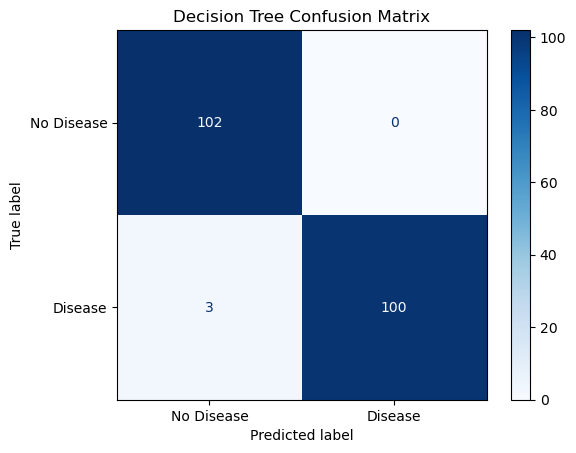


Classification Report (Decision Tree):
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205


Pruned Decision Tree Accuracy: 0.78


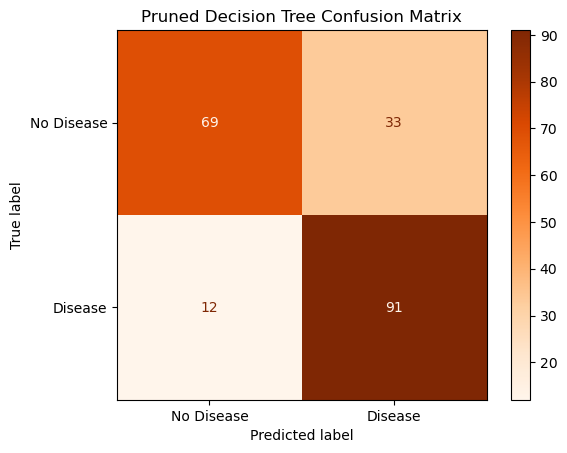


Classification Report (Pruned Decision Tree):
              precision    recall  f1-score   support

           0       0.85      0.68      0.75       102
           1       0.73      0.88      0.80       103

    accuracy                           0.78       205
   macro avg       0.79      0.78      0.78       205
weighted avg       0.79      0.78      0.78       205


Random Forest Accuracy: 0.99


In [13]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

# Load Dataset
df = pd.read_csv(r"C:\Users\haripriya\Desktop\heart (1).csv")

# Dataset Overview
print("\n--- Dataset Preview ---")
print(df.head())
print("\n--- Dataset Info ---")
print(df.info())

# Features and Target
X = df.drop('target', axis=1)
y = df['target']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# -----------------------------------------
# Full Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Predictions & Accuracy
y_pred = dt_model.predict(X_test)
print(f"\nDecision Tree Accuracy: {accuracy_score(y_test, y_pred):.2f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Disease", "Disease"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Decision Tree Confusion Matrix")
plt.show()

print("\nClassification Report (Decision Tree):")
print(classification_report(y_test, y_pred))

# -----------------------------------------
# Pruned Decision Tree (max_depth = 3)
dt_pruned = DecisionTreeClassifier(max_depth=3, random_state=42)
dt_pruned.fit(X_train, y_train)

# Predictions & Accuracy
y_pred_pruned = dt_pruned.predict(X_test)
print(f"\nPruned Decision Tree Accuracy: {accuracy_score(y_test, y_pred_pruned):.2f}")

# Confusion Matrix for Pruned Tree
cm_pruned = confusion_matrix(y_test, y_pred_pruned)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_pruned, display_labels=["No Disease", "Disease"])
disp.plot(cmap=plt.cm.Oranges)
plt.title("Pruned Decision Tree Confusion Matrix")
plt.show()

print("\nClassification Report (Pruned Decision Tree):")
print(classification_report(y_test, y_pred_pruned))

# -----------------------------------------
# Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions & Accuracy
y_pred_rf = rf_model.predict(X_test)
print(f"\nRandom Forest Accuracy: {accuracy_score(y_test, y_pred_rf):.2f}")



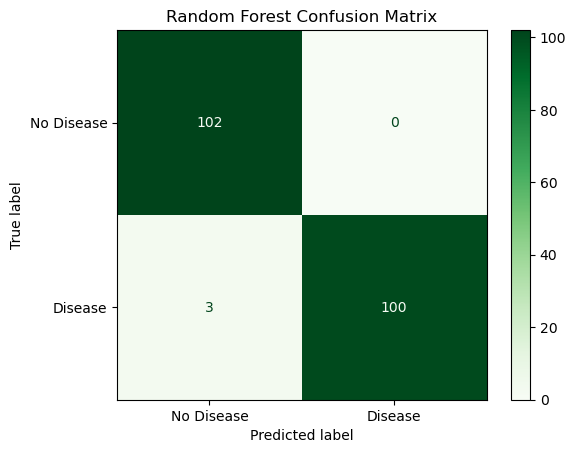


Classification Report (Random Forest):
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



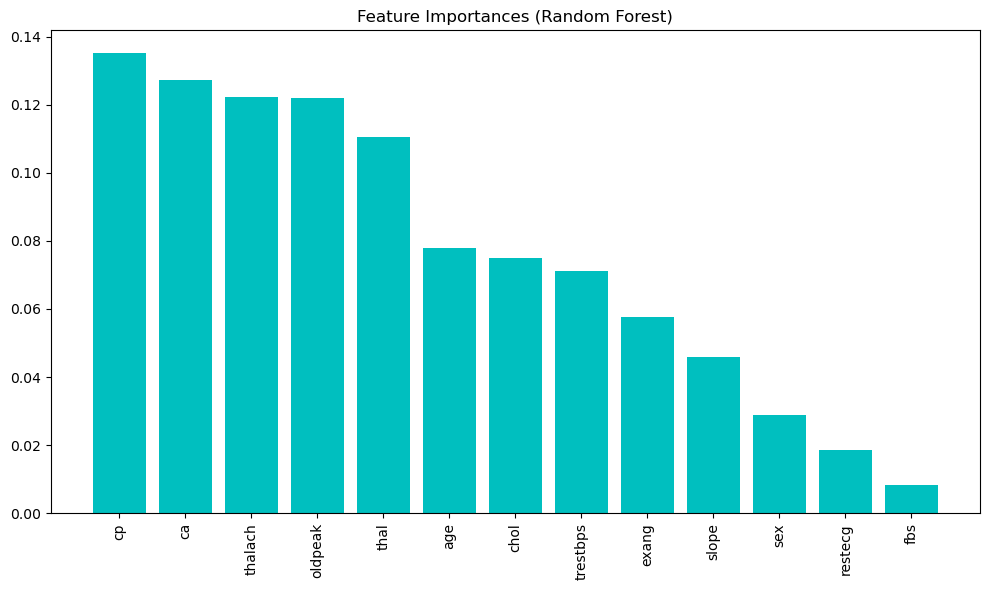


Pruned Decision Tree CV Accuracy: 0.83 (+/- 0.02)
Random Forest CV Accuracy: 1.00 (+/- 0.01)


In [14]:
# Confusion Matrix for Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=["No Disease", "Disease"])
disp.plot(cmap=plt.cm.Greens)
plt.title("Random Forest Confusion Matrix")
plt.show()

print("\nClassification Report (Random Forest):")
print(classification_report(y_test, y_pred_rf))

# -----------------------------------------
# Feature Importance Plot for Random Forest
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,6))
plt.title("Feature Importances (Random Forest)")
plt.bar(range(X.shape[1]), importances[indices], color="c", align="center")
plt.xticks(range(X.shape[1]), [X.columns[i] for i in indices], rotation=90)
plt.tight_layout()
plt.show()

# -----------------------------------------
# Cross-Validation for Pruned Decision Tree
dt_cv = cross_val_score(dt_pruned, X, y, cv=5)
print(f"\nPruned Decision Tree CV Accuracy: {dt_cv.mean():.2f} (+/- {dt_cv.std():.2f})")

# Cross-Validation for Random Forest
rf_cv = cross_val_score(rf_model, X, y, cv=5)
print(f"Random Forest CV Accuracy: {rf_cv.mean():.2f} (+/- {rf_cv.std():.2f})")
